<a href="https://colab.research.google.com/github/VIKAS2412-BYTE/Telecom_Churn_Data_Analysis/blob/main/Final_of_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style

In [ ]:
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading csv data
df =pd.read_csv("drive/My Drive/Colab Notebooks/Copy of Telecom Churn.csv")

In [ ]:
#configuration of the table
df.shape

(3333, 20)

In [ ]:
#showing the table
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#information of table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### #From above it becomes clear that the data is having no null values

In [ ]:
#description of table
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.sort_values(by=['Churn'], ascending=False)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1784,DE,51,415,Yes,No,0,153.6,108,26.11,232.9,85,19.80,214.2,92,9.64,14.1,4,3.81,0,True
588,OK,101,408,No,No,0,89.7,118,15.25,260.1,79,22.11,170.1,93,7.65,13.5,11,3.65,5,True
546,WI,69,510,Yes,No,0,279.8,90,47.57,248.7,91,21.14,171.0,118,7.69,8.4,10,2.27,2,True
547,VT,95,510,Yes,Yes,41,136.8,91,23.26,200.8,61,17.07,133.7,67,6.02,10.3,9,2.78,5,True
550,AK,111,415,No,No,0,172.8,58,29.38,183.1,108,15.56,158.8,104,7.15,7.9,3,2.13,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,MI,67,510,No,Yes,35,245.4,89,41.72,148.2,102,12.60,274.0,136,12.33,7.5,6,2.03,1,False
1183,IN,154,510,No,Yes,32,192.3,82,32.69,165.3,134,14.05,205.0,74,9.23,9.0,1,2.43,2,False
1184,ME,69,510,No,No,0,194.2,122,33.01,242.1,81,20.58,215.8,80,9.71,9.7,3,2.62,2,False
1185,DC,123,415,No,No,0,211.0,92,35.87,217.0,102,18.45,214.8,104,9.67,9.8,7,2.65,3,False


## Adding required columns for analysis

In [ ]:
df['total minutes domestic'] = df['Total day minutes']+df['Total eve minutes']+df['Total night minutes']

In [ ]:
df['total charge domestic'] = df['Total day charge']+df['Total eve charge']+df['Total night charge']

In [ ]:
df['avg domestic charge per min'] = df['total charge domestic']/df['total minutes domestic']

In [ ]:
df['day charge per min'] = df['Total day charge']/df['Total day minutes']

In [ ]:
df['eve charge per min'] = df['Total eve charge']/df['Total eve minutes']

In [ ]:
df['night charge per min'] = df['Total night charge']/df['Total night minutes']

In [ ]:
df['intl charge per min'] = df['Total intl charge']/df['Total intl minutes']

In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl charge,Customer service calls,Churn,total minutes domestic,total charge domestic,avg domestic charge per min,day charge per min,eve charge per min,night charge per min,intl charge per min
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,2.70,1,False,707.2,72.86,0.103026,0.170011,0.085005,0.044994,0.270000
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,3.70,1,False,611.5,55.54,0.090826,0.169988,0.085013,0.045008,0.270073
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,3.29,0,False,527.2,59.00,0.111912,0.170008,0.084983,0.045018,0.269672
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,1.78,2,False,558.2,65.02,0.116482,0.170007,0.084976,0.044997,0.269697
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,2.73,3,False,501.9,49.36,0.098346,0.170006,0.085030,0.044997,0.270297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,2.67,2,False,650.8,57.43,0.088245,0.169974,0.085012,0.045002,0.269697
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,2.59,3,False,575.8,60.94,0.105835,0.170013,0.085007,0.045008,0.269792
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,3.81,2,False,661.5,63.93,0.096644,0.170022,0.085007,0.045023,0.270213
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,1.35,2,False,512.6,56.18,0.109598,0.170019,0.085025,0.044971,0.270000




Removing column not required for analysis 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        3333 non-null   object 
 1   Account length               3333 non-null   int64  
 2   Area code                    3333 non-null   int64  
 3   International plan           3333 non-null   object 
 4   Voice mail plan              3333 non-null   object 
 5   Number vmail messages        3333 non-null   int64  
 6   Total day minutes            3333 non-null   float64
 7   Total day calls              3333 non-null   int64  
 8   Total day charge             3333 non-null   float64
 9   Total eve minutes            3333 non-null   float64
 10  Total eve calls              3333 non-null   int64  
 11  Total eve charge             3333 non-null   float64
 12  Total night minutes          3333 non-null   float64
 13  Total night calls 

Grouping by area code

In [ ]:
df.groupby('Area code').size().sort_values(ascending=False)

Area code
415    1655
510     840
408     838
dtype: int64

Graph for grouping by area code

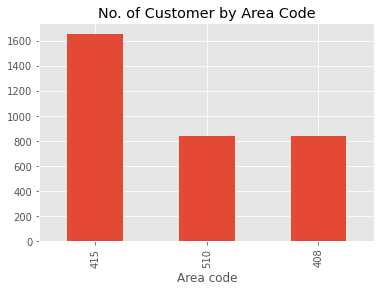

In [ ]:
df.groupby('Area code').size().sort_values(ascending=False).plot(kind='bar',title='No. of Customer by Area Code')

The maximum number of customers are from area code 415 i.e. close to 1600. Other two area codes, namely 510 & 408 have only roughly 50 % of customers are in area 415.

Grouping by subscription of international plans

In [ ]:
df.groupby('International plan').size()

International plan
No     3010
Yes     323
dtype: int64

Plotting graph for internnational plan

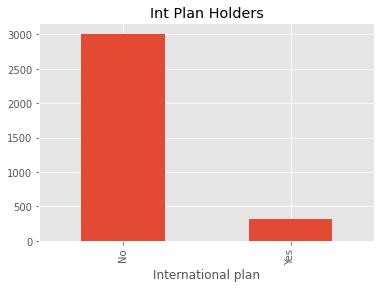

In [ ]:
df.groupby('International plan').size().plot(kind='bar',title='Int Plan Holders')

## As from the data above it is clear that only close to 10% of total customers, i.e., 323 have an international plan. 

In [ ]:
int_group = df.groupby('International plan')
print(int_group.get_group('Yes'))

     State  Account length  Area code International plan Voice mail plan  \
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
5       AL             118        510                Yes              No   
7       MO             147        415                Yes              No   
9       WV             141        415                Yes             Yes   
...    ...             ...        ...                ...             ...   
3304    IL              71        510                Yes              No   
3309    VT             100        408                Yes              No   
3317    SD             163        415                Yes              No   
3320    GA             122        510                Yes              No   
3331    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
3                   

In [ ]:
print(int_group.get_group('No'))

     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
6       MA             121        510                 No             Yes   
8       LA             117        408                 No              No   
...    ...             ...        ...                ...             ...   
3327    SC              79        415                 No              No   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3330    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

In [ ]:
int_group.sum()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total intl charge,Customer service calls,Churn,total minutes domestic,total charge domestic,avg domestic charge per min,day charge per min,eve charge per min,night charge per min,intl charge per min
International plan,,,,,,,,,,,,,,,,,,,,,
No,303234,1313891,24260,538470.6,302237,91541.61,603995.9,301224,51340.26,606066.0,...,8287.37,4736,346,1748532.5,170155.11,292.410793,511.369274,255.768426,135.451300,808.015087
Yes,33615,143238,2734,60719.8,32515,10322.56,65871.6,32457,5599.18,63440.5,...,926.98,473,137,190031.9,18776.57,31.854764,54.911499,27.455482,14.534852,87.222362


In [ ]:
plan_size = int_group.size()
plan_size

International plan
No     3010
Yes     323
dtype: int64

In [ ]:
plan_churn = int_group['Churn'].sum()
plan_churn

International plan
No     346
Yes    137
Name: Churn, dtype: int64

In [ ]:
churn_percnt = round(plan_churn*100/plan_size,2)
churn_percnt

International plan
No     11.50
Yes    42.41
dtype: float64

# As clearly reflected from the graph, it can be seen that the international plan holder have the highest percentage of churn, 42.4 % while domestic churn is limited to 11.5%. 

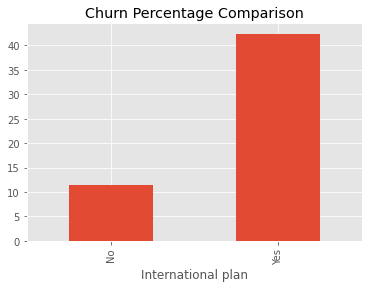

In [ ]:
churn_percnt.plot(kind='bar',title='Churn Percentage Comparison')

## Carrying out analysis to compare domestic plan tarrif and internnational plan tarrif

International plan
No     0.085001
Yes    0.085001
dtype: float64


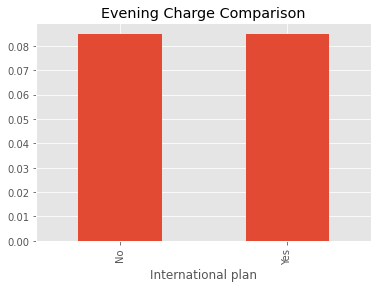

In [ ]:
int_group_sum = int_group.sum()

eve_charges = int_group_sum['Total eve charge']/int_group_sum['Total eve minutes']
print(eve_charges)
eve_charges.plot(kind='bar',title='Evening Charge Comparison')

International plan
No     0.170003
Yes    0.170003
dtype: float64


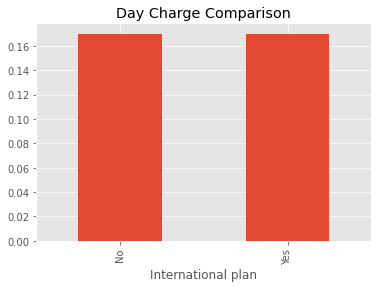

In [ ]:
day_charges = int_group_sum['Total day charge']/int_group_sum['Total day minutes']
print(day_charges)
day_charges.plot(kind='bar',title='Day Charge Comparison')

International plan
No     0.045
Yes    0.045
dtype: float64


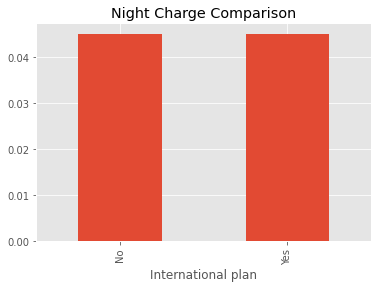

In [ ]:
night_charges = int_group_sum['Total night charge']/int_group_sum['Total night minutes']
print(night_charges)
night_charges.plot(kind='bar',title='Night Charge Comparison')

International plan
No     0.097313
Yes    0.098807
dtype: float64


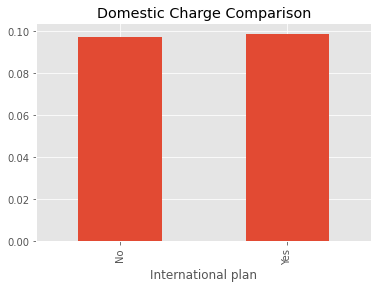

In [ ]:
domestic_charges = int_group_sum['total charge domestic']/int_group_sum['total minutes domestic']
print(domestic_charges)
domestic_charges.plot(kind='bar',title='Domestic Charge Comparison')

International plan
No     0.270052
Yes    0.270028
dtype: float64


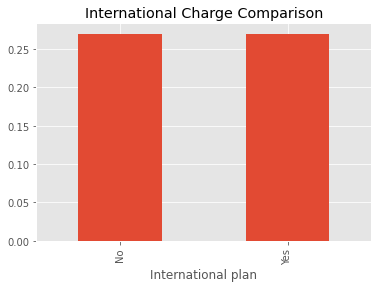

In [ ]:
int_charges = int_group_sum['Total intl charge']/int_group_sum['Total intl minutes']
print(int_charges)
int_charges.plot(kind='bar',title='International Charge Comparison')

# From the above analysis it is clear that even for international calls the calling rates for international plan holders and non-holders is the same. Hence, there are no benefits of holding an international plan over domestic plan even for an international caller.

## Tarrif comparison for international calls and domestic calls.

In [ ]:
diff_tarrif = (int_charges-domestic_charges)*100/domestic_charges
diff_tarrif

International plan
No     177.508862
Yes    173.287307
dtype: float64

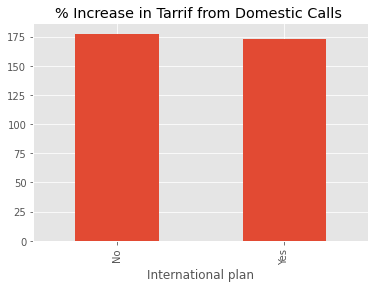

In [ ]:
diff_tarrif.plot(kind='bar',title='% Increase in Tarrif from Domestic Calls ')

In [ ]:
diff_tarrif.mean()

175.39808453210287

### It can be seen that on an average,the international calls are 175% that is 1.75 times more costlier that the domestic calls.

# This high difference in tarrif can also pose as a reason for high churn rates amongst the international plan holders.



# > Now let's explore if the churn is concentrated to one particular area code



In [ ]:
df['Area code'].unique()

array([415, 408, 510])

In [ ]:
area_code_group = df.groupby('Area code')
print(area_code_group.get_group(415))

     State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
4       OK              75        415                Yes              No   
7       MO             147        415                Yes              No   
...    ...             ...        ...                ...             ...   
3326    OH              96        415                 No              No   
3327    SC              79        415                 No              No   
3328    AZ             192        415                 No             Yes   
3329    WV              68        415                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                   

In [ ]:
print(area_code_group.get_group(408))

     State  Account length  Area code International plan Voice mail plan  \
3       OH              84        408                Yes              No   
8       LA             117        408                 No              No   
12      IA             168        408                 No              No   
16      ID              85        408                 No             Yes   
21      CO              77        408                 No              No   
...    ...             ...        ...                ...             ...   
3309    VT             100        408                Yes              No   
3312    SC             181        408                 No              No   
3313    ID             127        408                 No              No   
3322    MD              62        408                 No              No   
3325    OH              78        408                 No              No   

      Number vmail messages  Total day minutes  Total day calls  \
3                   

In [ ]:
print(area_code_group.get_group(510))

     State  Account length  Area code International plan Voice mail plan  \
5       AL             118        510                Yes              No   
6       MA             121        510                 No             Yes   
13      MT              95        510                 No              No   
17      VT              93        510                 No              No   
18      VA              76        510                 No             Yes   
...    ...             ...        ...                ...             ...   
3304    IL              71        510                Yes              No   
3316    MS             103        510                 No             Yes   
3320    GA             122        510                Yes              No   
3330    RI              28        510                 No              No   
3331    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
5                   

In [ ]:
area_code_group.size()

Area code
408     838
415    1655
510     840
dtype: int64

In [ ]:
area_code_group.sum()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Total intl charge,Customer service calls,Churn,total minutes domestic,total charge domestic,avg domestic charge per min,day charge per min,eve charge per min,night charge per min,intl charge per min
Area code,,,,,,,,,,,,,,,,,,,,,
408,85373,6426,148473.0,84216,25240.79,168676.2,83623,14337.60,166941.9,82995,...,2291.71,1273,122,484091.1,47090.88,81.329521,142.462468,71.230752,37.710389,224.696170
415,167269,13832,300535.8,166454,51092.06,332079.2,166334,28226.97,334372.2,166159,...,4622.84,2572,236,966987.2,94365.95,161.259991,281.185985,140.591394,74.475684,445.055305
510,84207,6736,150181.6,84082,25531.32,169112.1,83724,14374.87,168192.4,84505,...,2299.80,1364,125,487486.1,47474.85,81.676045,142.632321,71.401763,37.800079,225.485973


In [ ]:
area_size = area_code_group.size()
print(area_size)

Area code
408     838
415    1655
510     840
dtype: int64


In [ ]:
area_churn = area_code_group['Churn'].sum()
print(area_churn)

Area code
408    122
415    236
510    125
Name: Churn, dtype: int64


In [ ]:
perc_area_churn = round(area_churn*100/area_size)
print(perc_area_churn)

Area code
408    15.0
415    14.0
510    15.0
dtype: float64


## From the graph it can be seen that the churn is uniformly distributed amongst areas. Hence, the problem is not a concentrated issue.

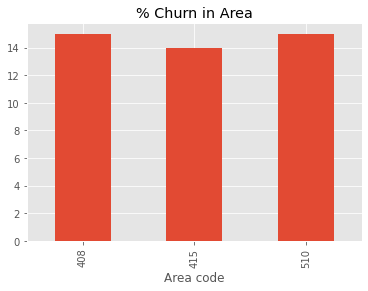

In [ ]:
perc_area_churn.plot(kind='bar',title='% Churn in Area')

F